In [1]:
library(wesanderson)

In [2]:
names(wes_palettes)

[1] "BottleRocket1"     "BottleRocket2"     "Rushmore1"        
 [4] "Rushmore"          "Royal1"            "Royal2"           
 [7] "Zissou1"           "Zissou1Continuous" "Darjeeling1"      
[10] "Darjeeling2"       "Chevalier1"        "FantasticFox1"    
[13] "Moonrise1"         "Moonrise2"         "Moonrise3"        
[16] "Cavalcanti1"       "GrandBudapest1"    "GrandBudapest2"   
[19] "IsleofDogs1"       "IsleofDogs2"       "FrenchDispatch"   
[22] "AsteroidCity1"     "AsteroidCity2"     "AsteroidCity3"

In [14]:
library(tidyverse)
library(cowplot)
library(ragg)
library(RcppCNPy)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.3     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.3     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.0
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'cowplot'


The following object is masked from 'package:lubridate':

    stamp




In [29]:
dat.theta = npyLoad('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/th_grp_mv.npy')
dat.magni = npyLoad('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/rd_grp_mv.npy')
dat.color = npyLoad('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/color_grp_mv.npy')
dat.parc  = read.csv('/Users/weiwei/Documents/Work/PARIS/Zone_HSV_movie/mmp_parc.csv')[,2]
dat.brod  = read.csv('/Users/weiwei/Documents/Work/PARIS/Zone_HSV_movie/brodmann_32k.csv')[,2]

In [25]:
dat.parc.use = rep(0, length(dat.parc))
dat.brod.use = rep(0, length(dat.brod))

dat.parc.use[(dat.parc==24)|(dat.parc==204)|
            (dat.parc==174)|(dat.parc==354)|
            (dat.parc==124)|(dat.parc==304)] = 1

dat.parc.use[(dat.parc==175)|(dat.parc==355)|
            (dat.parc==125)|(dat.parc==305)] = 2

dat.parc.use[(dat.parc==128)|(dat.parc==308)|
            (dat.parc==129)|(dat.parc==309)] = 3

dat.parc.use[(dat.parc==130)|(dat.parc==310)|
            (dat.parc==176)|(dat.parc==356)] = 4

dat.brod.use[dat.brod==86] = 1
dat.brod.use[dat.brod==87] = 2
dat.brod.use[dat.brod==70] = 3
dat.brod.use[dat.brod==78] = 4
dat.brod.use[dat.brod==79] = 5
dat.brod.use[dat.brod==76] = 6
dat.brod.use[dat.brod==58] = 7
dat.brod.use[dat.brod==59] = 7
dat.brod.use[dat.brod==62] = 7
dat.brod.use[dat.brod==60] = 8
dat.brod.use[dat.brod==61] = 9
dat.brod.use[dat.brod==64] = 10

In [35]:
dat.brodmann = factor(dat.brod.use, 
                    levels = c(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10),
                    labels = c('NA', 'BA17', 'BA18', 'BA19', 'BA37', 'BA20', 'BA21', 'BA1_2_3', 'BA5', 'BA7', 'BA40'))

dat.parcel = factor(dat.parc.use,
                    levels = c(0,1,2,3,4),
                    labels = c('NA','A1 A2 A3', 'A4 A5', 'STS_d', 'STS_v'))

df.data = data.frame(dat.theta, dat.magni, dat.brodmann, dat.parcel, rgb(dat.color), dat.brod.use)
colnames(df.data) = c('Theta', 'Magnitude', 'Brodmann', 'MMP', 'Color', 'brod')

head(df.data)

,Theta,Magnitude,Brodmann,MMP,Color,brod
,<dbl>,<dbl>,<fct>,<fct>,<chr>,<dbl>
1,0.9776731,0.2788877,NA,NA,#DBD79E,0
2,2.0580176,0.8190907,BA1_2_3,NA,#2EDB28,7
3,3.2059874,0.6495430,NA,NA,#4DD3DB,0
4,3.3685823,0.1753379,NA,NA,#B5D3DB,0
5,6.2700093,0.9808285,BA18,NA,#DB0407,2
6,1.4277650,0.1079935,BA40,NA,#D3DBC4,10


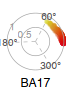

In [285]:
options(repr.plot.width = 15/25.4, repr.plot.height = 20/25.4)
# options(repr.plot.width = 9, repr.plot.height = 1.5)

sz.circ.label = 2
sz.circ.curve = 8
line.size = 0.15

df.draw = df.data[(df.data$brod==1),]
f4.v.lab = ggplot(df.draw, aes(Theta * 360 / (2 * pi), y = Magnitude)) +
            ggrastr::geom_point_rast(alpha = 0.1, size = 0.5, color = df.draw$Color) +
            geom_hline(yintercept = c(0.5, 1), color = "grey65", size = line.size) +
            geom_vline(xintercept = c(60, 180, 300), color = "grey70", size = line.size, linetype = "dashed") +
            labs(x = NULL, y = NULL) +
            # scale_x_continuous(limits = c(0, 360), breaks = c(0, 120, 240), labels = c("Visual", "Somatosensory", "Auditory")) +
            scale_y_continuous(limits = c(0, 1), breaks = c(0.5, 0.75, 1), labels = NULL) +
            annotate("text", x = 145, y = 0.45, label = "0.5", color = "grey60", size = sz.circ.label) +
            # annotate("text", x = 145, y = 0.69, label = "0.75", color = "grey60", size = sz.circ.label) +
            annotate("text", x = 145, y = 0.96, label = "1", color = "grey60", size = sz.circ.label) +
            annotate("text", x = 60, y = 1, label = "60\u00B0", color = "#545252", size = sz.circ.label) +
            annotate("text", x = 180, y = 1, label = "180\u00B0", color = "#545252", size = sz.circ.label) +
            annotate("text", x = 300, y = 1, label = "300\u00B0", color = "#545252", size = sz.circ.label) +
            #annotate("text", x = 190, y = 0.2, label = "G1", color = "#545252", size = 6) +
            coord_polar(theta = "x", direction = -1, start = 4.75, clip = "off") +
            theme_void() +
            facet_wrap(~Brodmann, nrow=1, strip.position = 'bottom') +
            theme(
                panel.background = element_rect(fill = "transparent", colour = NA_character_),
                strip.text = element_text(size=7)
                ) 

ggrastr::rasterize(f4.v.lab, layer='points', dpi=600)           
# print(f4.v.lab)

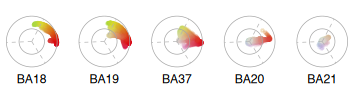

In [286]:
options(repr.plot.width = 75/25.4, repr.plot.height = 20/25.4)
# options(repr.plot.width = 9, repr.plot.height = 1.5)

sz.circ.label = 2
sz.circ.curve = 8
line.size = 0.15

df.draw = df.data[(df.data$brod>1)&(df.data$brod<=6),]
f4.v.left = ggplot(df.draw, aes(Theta * 360 / (2 * pi), y = Magnitude)) +
            ggrastr::geom_point_rast(alpha = 0.1, size = 0.5, color = df.draw$Color) +
            geom_hline(yintercept = c(0.5, 1), color = "grey65", size = line.size) +
            geom_vline(xintercept = c(60, 180, 300), color = "grey70", size = line.size, linetype = "dashed") +
            labs(x = NULL, y = NULL) +
            # scale_x_continuous(limits = c(0, 360), breaks = c(0, 120, 240), labels = c("Visual", "Somatosensory", "Auditory")) +
            scale_y_continuous(limits = c(0, 1), breaks = c(0.5, 0.75, 1), labels = NULL) +
            # annotate("text", x = 145, y = 0.45, label = "0.5", color = "grey60", size = sz.circ.label) +
            # # annotate("text", x = 145, y = 0.69, label = "0.75", color = "grey60", size = sz.circ.label) +
            # annotate("text", x = 145, y = 0.96, label = "1", color = "grey60", size = sz.circ.label) +
            # annotate("text", x = 60, y = 1, label = "60\u00B0", color = "#545252", size = sz.circ.label) +
            # annotate("text", x = 180, y = 1, label = "180\u00B0", color = "#545252", size = sz.circ.label) +
            # annotate("text", x = 300, y = 1, label = "300\u00B0", color = "#545252", size = sz.circ.label) +
            #annotate("text", x = 190, y = 0.2, label = "G1", color = "#545252", size = 6) +
            coord_polar(theta = "x", direction = -1, start = 4.75, clip = "off") +
            theme_void() +
            facet_wrap(~Brodmann, nrow=1, strip.position = 'bottom') +
            theme(
                panel.background = element_rect(fill = "transparent", colour = NA_character_),
                strip.text = element_text(size=7)
                ) 

ggrastr::rasterize(f4.v.left, layer='points', dpi=600)           
# print(f4.v.left)

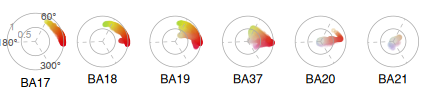

In [293]:
options(repr.plot.width = 90/25.4, repr.plot.height = 20/25.4)

f4.v = plot_grid(f4.v.lab, f4.v.left, nrow=1, rel_widths=c(1,5))
ggrastr::rasterize(f4.v, layer='points', dpi=600) 
# ggdraw(f4.v)

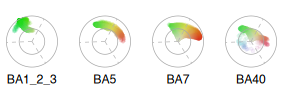

In [288]:
options(repr.plot.width = 60/25.4, repr.plot.height = 20/25.4)
# options(repr.plot.width = 9, repr.plot.height = 1.5)

sz.circ.label = 2
sz.circ.curve = 8
line.size = 0.15

df.draw = df.data[(df.data$brod!=0)&(df.data$brod>6),]
f4.s = ggplot(df.draw, aes(Theta * 360 / (2 * pi), y = Magnitude)) +
            ggrastr::geom_point_rast(alpha = 0.1, size = 0.5, color = df.draw$Color) +
            geom_hline(yintercept = c(0.5, 1), color = "grey65", size = line.size) +
            geom_vline(xintercept = c(60, 180, 300), color = "grey70", size = line.size, linetype = "dashed") +
            labs(x = NULL, y = NULL) +
            # scale_x_continuous(limits = c(0, 360), breaks = c(0, 120, 240), labels = c("Visual", "Somatosensory", "Auditory")) +
            scale_y_continuous(limits = c(0, 1), breaks = c(0.5, 0.75, 1), labels = NULL) +
            # annotate("text", x = 145, y = 0.45, label = "0.5", color = "grey60", size = sz.circ.label) +
            # # annotate("text", x = 145, y = 0.69, label = "0.75", color = "grey60", size = sz.circ.label) +
            # annotate("text", x = 145, y = 0.96, label = "1", color = "grey60", size = sz.circ.label) +
            # annotate("text", x = 60, y = 1, label = "60\u00B0", color = "#545252", size = sz.circ.label) +
            # annotate("text", x = 180, y = 1, label = "180\u00B0", color = "#545252", size = sz.circ.label) +
            # annotate("text", x = 300, y = 1, label = "300\u00B0", color = "#545252", size = sz.circ.label) +
            #annotate("text", x = 190, y = 0.2, label = "G1", color = "#545252", size = 6) +
            coord_polar(theta = "x", direction = -1, start = 4.75, clip = "off") +
            theme_void() +
            facet_wrap(~Brodmann, nrow=1, strip.position = 'bottom') +
            theme(
                panel.background = element_rect(fill = "transparent", colour = NA_character_),
                strip.text = element_text(size=7)
                ) 

ggrastr::rasterize(f4.s, layer='points', dpi=600)           
# print(f4.s)

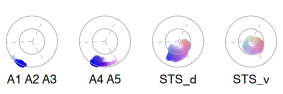

In [289]:
options(repr.plot.width = 60/25.4, repr.plot.height = 20/25.4)
# options(repr.plot.width = 9, repr.plot.height = 1.5)

sz.circ.label = 2
sz.circ.curve = 8
line.size = 0.15

df.draw = df.data[(df.data$MMP!='NA'),]
f4.a = ggplot(df.draw, aes(Theta * 360 / (2 * pi), y = Magnitude)) +
            ggrastr::geom_point_rast(alpha = 0.1, size = 0.5, color = df.draw$Color) +
            geom_hline(yintercept = c(0.5, 1), color = "grey65", size = line.size) +
            geom_vline(xintercept = c(60, 180, 300), color = "grey70", size = line.size, linetype = "dashed") +
            labs(x = NULL, y = NULL) +
            # scale_x_continuous(limits = c(0, 360), breaks = c(0, 120, 240), labels = c("Visual", "Somatosensory", "Auditory")) +
            scale_y_continuous(limits = c(0, 1), breaks = c(0.5, 0.75, 1), labels = NULL) +
            # annotate("text", x = 145, y = 0.45, label = "0.5", color = "grey60", size = sz.circ.label) +
            # # annotate("text", x = 145, y = 0.69, label = "0.75", color = "grey60", size = sz.circ.label) +
            # annotate("text", x = 145, y = 0.96, label = "1", color = "grey60", size = sz.circ.label) +
            # annotate("text", x = 60, y = 1, label = "60\u00B0", color = "#545252", size = sz.circ.label) +
            # annotate("text", x = 180, y = 1, label = "180\u00B0", color = "#545252", size = sz.circ.label) +
            # annotate("text", x = 300, y = 1, label = "300\u00B0", color = "#545252", size = sz.circ.label) +
            #annotate("text", x = 190, y = 0.2, label = "G1", color = "#545252", size = 6) +
            coord_polar(theta = "x", direction = -1, start = 4.75, clip = "off") +
            theme_void() +
            facet_wrap(~MMP, nrow=1, strip.position = 'bottom') +
            theme(
                panel.background = element_rect(fill = "transparent", colour = NA_character_),
                strip.text = element_text(size=7)
                ) 

ggrastr::rasterize(f4.a, layer='points', dpi=600)           
# print(f4.a)

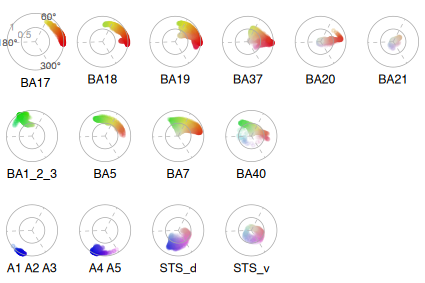

In [294]:
options(repr.plot.width = 90/25.4, repr.plot.height = 60/25.4)

f4.s.plus = plot_grid(f4.s, NULL, nrow = 1, rel_widths = c(2,1))
f4.a.plus = plot_grid(f4.a, NULL, nrow = 1, rel_widths = c(2,1))
f4.stream = plot_grid(f4.v, f4.s.plus, f4.a.plus, ncol=1, rel_heights = c(1,1,1))

ggrastr::rasterize(f4.stream, layer='points', dpi=600) 
# ggdraw(f4.stream)

In [219]:
img.v = '/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/vector/f_04/sf-v.png'
img.s = '/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/vector/f_04/sf-s.png'
img.a = '/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/vector/f_04/sf-a.png'

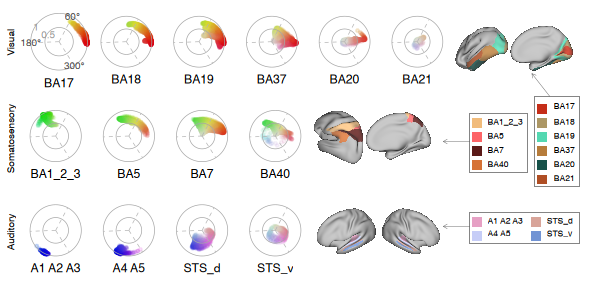

In [295]:
options(repr.plot.width = 125/25.4, repr.plot.height = 60/25.4)

f4.base = plot_grid(NULL, f4.stream, NULL, nrow=1, rel_widths=c(5,90,30), labels=c('','',''))
f4.final = ggdraw(f4.base) +

            draw_image(img.v, x = 0.77, y = 0.748, scale = 0.2, halign=0, valign=0) +
            draw_image(img.s, x = 0.53, y = 0.42, scale = 0.2, halign=0, valign=0) +
            draw_image(img.a, x = 0.535, y = 0.1, scale = 0.21, halign=0, valign=0) +

            annotate('text', x=0.018, y=0.85, label='Visual', angle=90, size=2) +
            annotate('text', x=0.018, y=0.51, label='Somatosensory', angle=90, size=2) +
            annotate('text', x=0.018, y=0.18, label='Auditory', angle=90, size=2) +

            annotate(geom = 'rect', xmin = 0.91, xmax = 0.91+0.015, ymin = 0.6, ymax = 0.6 + 0.015/12*25, fill = '#C52E19') +
            annotate(geom = 'rect', xmin = 0.91, xmax = 0.91+0.015, ymin = 0.55, ymax = 0.55 + 0.015/12*25, fill = '#AC9765') +
            annotate(geom = 'rect', xmin = 0.91, xmax = 0.91+0.015, ymin = 0.5, ymax = 0.5 + 0.015/12*25, fill = '#54D8B1') +
            annotate(geom = 'rect', xmin = 0.91, xmax = 0.91+0.015, ymin = 0.45, ymax = 0.45 + 0.015/12*25, fill = '#b67c3b') +
            annotate(geom = 'rect', xmin = 0.91, xmax = 0.91+0.015, ymin = 0.4, ymax = 0.4 + 0.015/12*25, fill = '#175149') +
            annotate(geom = 'rect', xmin = 0.91, xmax = 0.91+0.015, ymin = 0.35, ymax = 0.35 + 0.015/12*25, fill = '#AF4E24') +
            annotate(geom = 'text', x = 0.955, y = 0.625, label = 'BA17', size=1.7) +
            annotate(geom = 'text', x = 0.955, y = 0.625 - 0.055, label = 'BA18', size=1.7) +
            annotate(geom = 'text', x = 0.955, y = 0.63 - 0.055*2, label = 'BA19', size=1.7) +
            annotate(geom = 'text', x = 0.955, y = 0.635 - 0.055*3, label = 'BA37', size=1.7) +
            annotate(geom = 'text', x = 0.955, y = 0.64 - 0.055*4, label = 'BA20', size=1.7) +
            annotate(geom = 'text', x = 0.955, y = 0.645 - 0.055*5, label = 'BA21', size=1.7) +
            annotate('rect', xmin=0.905, xmax=0.98, ymin=0.34, ymax=0.66, alpha=0, color='black', linewidth=0.1) +
            annotate('segment', x = 0.93, y = 0.66, xend = 0.9, yend = 0.74, arrow=arrow(length = unit(.1,"cm")), alpha=0.6, color='black', linetype = "solid", size=0.1) +

            annotate(geom = 'rect', xmin = 0.8, xmax = 0.8+0.015, ymin = 0.55, ymax = 0.55 + 0.015/12*25, fill = '#F1BB7B') +
            annotate(geom = 'rect', xmin = 0.8, xmax = 0.8+0.015, ymin = 0.5, ymax = 0.5 + 0.015/12*25, fill = '#FD6467') +
            annotate(geom = 'rect', xmin = 0.8, xmax = 0.8+0.015, ymin = 0.45, ymax = 0.45 + 0.015/12*25, fill = '#5B1A18') +
            annotate(geom = 'rect', xmin = 0.8, xmax = 0.8+0.015, ymin = 0.4, ymax = 0.4 + 0.015/12*25, fill = '#D67236') +
            annotate(geom = 'text', x = 0.825, y = 0.625 - 0.055, label = 'BA1_2_3', size=1.7, hjust='left') +
            annotate(geom = 'text', x = 0.825, y = 0.63 - 0.055*2, label = 'BA5', size=1.7, hjust='left') +
            annotate(geom = 'text', x = 0.825, y = 0.635 - 0.055*3, label = 'BA7', size=1.7, hjust='left') +
            annotate(geom = 'text', x = 0.825, y = 0.64 - 0.055*4, label = 'BA40', size=1.7, hjust='left') +
            annotate('rect', xmin=0.795, xmax=0.892, ymin=0.39, ymax=0.6, alpha=0, color='black', linewidth=0.1) +
            annotate('segment', x = 0.795, y = 0.5, xend = 0.75, yend = 0.5, arrow=arrow(length = unit(.1,"cm")), alpha=0.6, color='black', linetype = "solid", size=0.1) +

            annotate(geom = 'rect', xmin = 0.8, xmax = 0.8+0.015, ymin = 0.2, ymax = 0.2 + 0.015/12*25, fill = '#E6A0C4') +
            annotate(geom = 'rect', xmin = 0.8, xmax = 0.8+0.015, ymin = 0.15, ymax = 0.15 + 0.015/12*25, fill = '#C6CDF7') +
            annotate(geom = 'rect', xmin = 0.9, xmax = 0.9+0.015, ymin = 0.2, ymax = 0.2 + 0.015/12*25, fill = '#D8A499') +
            annotate(geom = 'rect', xmin = 0.9, xmax = 0.9+0.015, ymin = 0.15, ymax = 0.15 + 0.015/12*25, fill = '#7294D4')+
            annotate(geom = 'text', x = 0.825, y = 0.22, label = 'A1 A2 A3', size=1.7, hjust='left') +
            annotate(geom = 'text', x = 0.825, y = 0.175, label = 'A4 A5', size=1.7, hjust='left') +
            annotate(geom = 'text', x = 0.925, y = 0.22, label = 'STS_d', size=1.7, hjust='left') +
            annotate(geom = 'text', x = 0.925, y = 0.175, label = 'STS_v', size=1.7, hjust='left') +
            annotate('rect', xmin=0.795, xmax=0.98, ymin=0.14, ymax=0.25, alpha=0, color='black', linewidth=0.1) +
            annotate('segment', x = 0.795, y = 0.2, xend = 0.75, yend = 0.2, arrow=arrow(length = unit(.1,"cm")), alpha=0.6, color='black', linetype = "solid", size=0.1)  
            

ggrastr::rasterize(f4.final, layer='points', dpi=600) 
# ggdraw(f4.final)

In [250]:
agg_png("/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/ggplot/f_04_v5.png", 
           width = 12.5, height = 6, res = 600, units = 'cm', background = 'white')
print(f4.final)
invisible(dev.off())

In [296]:
cowplot::ggsave2(path='/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/ggplot/',filename='f_04_v6.pdf', width = 12.5,height = 6,units =  "cm", dpi = 600, plot=f4.final)

In [143]:
wes_palettes$AsteroidCity2
wes_palettes$GrandBudapest1
wes_palettes$GrandBudapest2

[1] "#C52E19" "#AC9765" "#54D8B1" "#b67c3b" "#175149" "#AF4E24"

[1] "#F1BB7B" "#FD6467" "#5B1A18" "#D67236"

[1] "#E6A0C4" "#C6CDF7" "#D8A499" "#7294D4"

In [1]:
library(ggDoubleHeat)
library(ggplot2)

In [2]:
cate1 = c(rep(c('S1-MV-7T'),6), rep(c('S2-MV-7T'),6), rep(c('S1-RS-7T'),6), rep(c('S2-RS-7T'),6), rep(c('S1-RS-3T'),6), rep(c('S2-RS-3T'),6))
cate2 = rep(c('S1-MV-7T','S2-MV-7T','S1-RS-7T','S2-RS-7T','S1-RS-3T','S2-RS-3T'),2)

cate1 = factor(cate1,
                levels = c('S1-MV-7T','S2-MV-7T','S1-RS-7T','S2-RS-7T','S1-RS-3T','S2-RS-3T'))
cate2 = factor(cate2,
                levels = c('S1-MV-7T','S2-MV-7T','S1-RS-7T','S2-RS-7T','S1-RS-3T','S2-RS-3T'))

corrA = c(1, 0.923, 0.367, 0.389, 0.457, 0.454,
        0.923, 1, 0.396, 0.417, 0.459, 0.468,
        0.367, 0.396, 1, 0.965, 0.848, 0.916,
        0.389, 0.417, 0.965, 1, 0.894, 0.938,
        0.457, 0.459, 0.848, 0.894, 1, 0.962,
        0.454, 0.468, 0.916, 0.938, 0.962, 1)
corrM = c(1, 0.983, 0.910, 0.906, 0.903, 0.897,
        0.983, 1, 0.929, 0.926, 0.924, 0.918,
        0.910, 0.929, 1, 0.996, 0.943, 0.943,
        0.906, 0.926, 0.996, 1, 0.941, 0.941,
        0.903, 0.924, 0.943, 0.941, 1, 0.995,
        0.897, 0.918, 0.943, 0.941, 0.995, 1)

df.corr = data.frame(cate1, cate2, corrA, corrM)
head(df.corr)

,cate1,cate2,corrA,corrM
,<fct>,<fct>,<dbl>,<dbl>
1,S1-MV-7T,S1-MV-7T,1.000,1.000
2,S1-MV-7T,S2-MV-7T,0.923,0.983
3,S1-MV-7T,S1-RS-7T,0.367,0.910
4,S1-MV-7T,S2-RS-7T,0.389,0.906
5,S1-MV-7T,S1-RS-3T,0.457,0.903
6,S1-MV-7T,S2-RS-3T,0.454,0.897


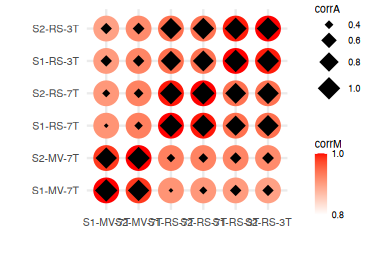

In [38]:
options(repr.plot.width = 80/25.4, repr.plot.height = 55/25.4)

a=ggplot(data = df.corr, aes(x = cate2, y = cate1)) +
    geom_point(aes(fill=corrM), shape=21, size=7, stroke=0.) +
    geom_point(aes(size=corrA), shape=18) +
    scale_fill_gradient(low='white', high='red', limit=c(0.8,1), breaks=c(0.8,1) ) +
    labs(x='',y='') +
    theme_minimal() +
    theme(axis.text = element_text(size = 6),
    legend.key.size = unit(0.26, 'cm'),
    legend.title = element_text(size=6),
    legend.text = element_text(size=5))

print(a)
ggsave(path='/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/ggplot/',filename='f_04_supp_v6.pdf', width = 8, height = 5.5,units =  "cm", dpi = 600, plot=a)

In [21]:
min(corrM)

[1] 0.897

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


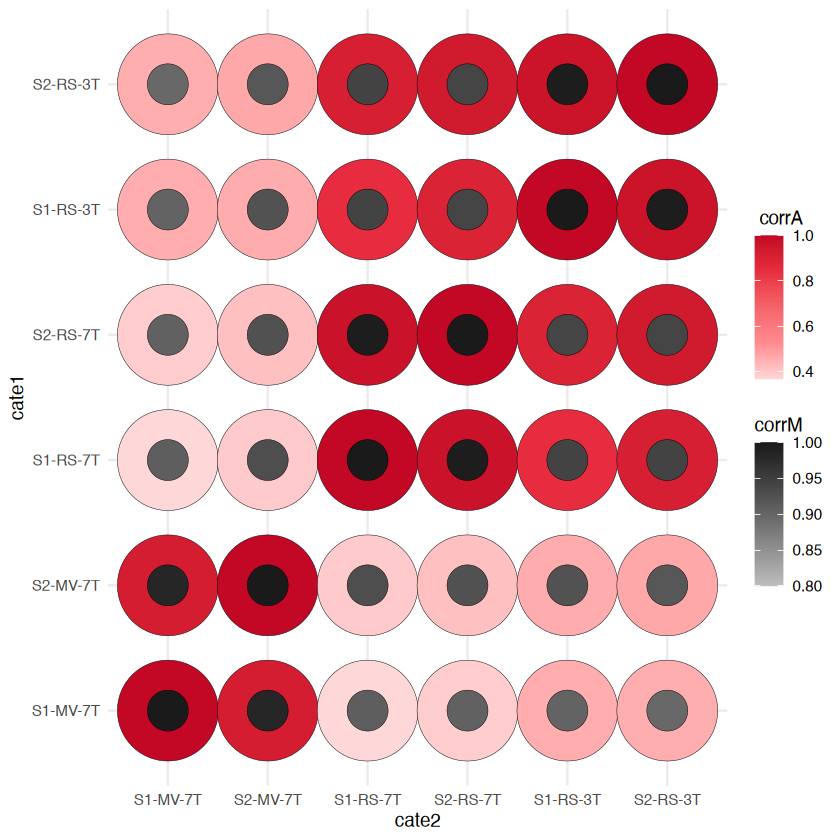

In [17]:
ggplot(data = df.corr, aes(x = cate2, y = cate1)) +
  geom_heat_circle(outside = corrA, inside = corrM, r=5) +
  scale_fill_gradient(limit=c(0.8,1), low='grey', high='grey10') +
  theme_minimal()